# 🔹 UFC Model Experiments

<div style="text-align: center;">
  🔹 <img src="../img/ufc_logo.png" width="50" /> 🔹
</div>

# Import Libraries and Setup Environment

In [1]:
# Import necessary libraries
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_colwidth', 200) 

# Get the current working directory
current_dir = os.getcwd()

# Navigate to the project root
project_root = os.path.abspath(os.path.join(current_dir, '..'))

# Import from /src
sys.path.append(os.path.join(project_root))
from src.metrics import *
from src.model_factory import model_factory
from src.model import UFCModel
from src.data import UFCData
from src.config import *
from src.io_model import load_data, load_all_models
from src.helpers import *

<div style="text-align: center;">
  🔹 <img src="../img/ufc_logo.png" width="50" /> 🔹
</div>

# Load Data

In [2]:
# Load UFCData
try:
    ufc_data = load_data(name='ufc_data')
    ufc_data_no_odds = load_data(name='ufc_data_no_odds')
except Exception as e:
    logger.error(f"❌ Error loading training data: {e}")

INFO:src.io_model:📦 UFCData object loaded from: /home/mlioi/ufc-predictor/data/processed/ufc_data.pkl
INFO:src.io_model:📦 UFCData object loaded from: /home/mlioi/ufc-predictor/data/processed/ufc_data_no_odds.pkl


In [3]:
ufc_data

📊 UFC Dataset Summary
----------------------------------------
🧪 Total samples      : 6001
🧪 Train/Test split  : 4800 / 1201
🧪 Total features     : 28

🔢 Numerical features : 25
🔠 Categorical features: 3
    - Binary          : 2
    - Multiclass      : 1

🏷 Label distribution (raw):
   - Class 0: 3484 (58.1%)
   - Class 1: 2517 (41.9%)

✅ No missing values detected

📈 Feature summary statistics (train set):
                        mean      std      min       max
BlueTotalTitleBouts    0.260    1.111     0.00    16.000
RedTotalTitleBouts     0.572    1.574     0.00    16.000
LoseStreakDif          0.059    1.012    -6.00     6.000
WinStreakDif          -0.162    1.921   -18.00    10.000
LongestWinStreakDif   -0.772    2.053   -12.00    14.000
KODif                 -0.536    2.181   -21.00    14.000
SubDif                -0.334    1.877   -15.00    10.000
HeightDif             -0.030    6.286   -33.02    30.480
ReachDif              -0.260    8.266   -33.02    30.480
AgeDif            

In [4]:
ufc_data_no_odds

📊 UFC Dataset Summary
----------------------------------------
🧪 Total samples      : 6001
🧪 Train/Test split  : 4800 / 1201
🧪 Total features     : 27

🔢 Numerical features : 24
🔠 Categorical features: 3
    - Binary          : 2
    - Multiclass      : 1

🏷 Label distribution (raw):
   - Class 0: 3484 (58.1%)
   - Class 1: 2517 (41.9%)

✅ No missing values detected

📈 Feature summary statistics (train set):
                      mean     std     min      max
BlueTotalTitleBouts  0.260   1.111    0.00   16.000
RedTotalTitleBouts   0.572   1.574    0.00   16.000
LoseStreakDif        0.059   1.012   -6.00    6.000
WinStreakDif        -0.162   1.921  -18.00   10.000
LongestWinStreakDif -0.772   2.053  -12.00   14.000
KODif               -0.536   2.181  -21.00   14.000
SubDif              -0.334   1.877  -15.00   10.000
HeightDif           -0.030   6.286  -33.02   30.480
ReachDif            -0.260   8.266  -33.02   30.480
AgeDif              -0.611   5.181  -17.00   16.000
SigStrDif       

<div style="text-align: center;">
  🔹 <img src="../img/ufc_logo.png" width="50" /> 🔹
</div>

# Load Models

In [5]:
model_list = load_all_models()

INFO:src.io_model:📦 Model 'Logistic Regression' loaded from: /home/mlioi/ufc-predictor/models/lr_best.pkl
INFO:src.io_model:📦 Model 'Logistic Regression' loaded from: /home/mlioi/ufc-predictor/models/lr_best_no_odds.pkl
INFO:src.io_model:📦 Model 'Random Forest' loaded from: /home/mlioi/ufc-predictor/models/rf_best.pkl
INFO:src.io_model:📦 Model 'Random Forest' loaded from: /home/mlioi/ufc-predictor/models/rf_best_no_odds.pkl
INFO:src.io_model:📦 Model 'Support Vector Machine' loaded from: /home/mlioi/ufc-predictor/models/svm_best.pkl
INFO:src.io_model:📦 Model 'Support Vector Machine' loaded from: /home/mlioi/ufc-predictor/models/svm_best_no_odds.pkl
INFO:src.io_model:📦 Model 'K-Nearest Neighbors' loaded from: /home/mlioi/ufc-predictor/models/knn_best.pkl
INFO:src.io_model:📦 Model 'K-Nearest Neighbors' loaded from: /home/mlioi/ufc-predictor/models/knn_best_no_odds.pkl
INFO:src.io_model:📦 Model 'AdaBoost' loaded from: /home/mlioi/ufc-predictor/models/ab_best.pkl
INFO:src.io_model:📦 Model '

<div style="text-align: center;">
  🔹 <img src="../img/ufc_logo.png" width="50" /> 🔹
</div>

# Evaluate Models

In [6]:
models_with_odds = [m for m in model_list if not m.is_no_odds]
models_no_odds = [m for m in model_list if m.is_no_odds]

# Evaluate metrics for WITH ODDS
for model in models_with_odds:
    model.metrics = evaluate_metrics(model, ufc_data)
    model.cm = evaluate_cm(model, ufc_data)

# Evaluate metrics for NO ODDS
for model in models_no_odds:
    model.metrics = evaluate_metrics(model, ufc_data_no_odds)
    model.cm = evaluate_cm(model, ufc_data_no_odds)

# Check Models

## Metrics Comparison

In [7]:
# Compare metrics WITH ODDS
metrics_with_odds = compare_metrics(models_with_odds)
display(metrics_with_odds)

INFO:src.metrics:🔍 Starting comparison of models...
INFO:src.metrics:Evaluating model: Logistic Regression
INFO:src.metrics:Evaluating model: Random Forest
INFO:src.metrics:Evaluating model: Support Vector Machine
INFO:src.metrics:Evaluating model: K-Nearest Neighbors
INFO:src.metrics:Evaluating model: AdaBoost
INFO:src.metrics:Evaluating model: Naive Bayes
INFO:src.metrics:Evaluating model: Extra Trees
INFO:src.metrics:Evaluating model: Gradient Boosting
INFO:src.metrics:Evaluating model: Quadratic Discriminant Analysis
INFO:src.metrics:Evaluating model: Neural Network
INFO:src.metrics:Evaluating model: XGBoost
INFO:src.metrics:✅ Comparison completed.


,Accuracy,Balanced Accuracy,Precision Red,Recall Red,F1 Red,Precision Blue,Recall Blue,F1 Blue,F1 Macro,ROC AUC,Brier Score,MCC,Kappa
Model,,,,,,,,,,,,,
Logistic Regression,0.6636,0.6459,0.6925,0.7561,0.7229,0.6136,0.5357,0.5720,0.6475,0.7145,0.2138,0.2989,0.2970
Random Forest,0.6669,0.6430,0.6840,0.7920,0.7340,0.6320,0.4940,0.5546,0.6443,0.7062,0.2142,0.3006,0.2949
Support Vector Machine,0.6669,0.6499,0.6962,0.7561,0.7249,0.6171,0.5437,0.5781,0.6515,0.7142,0.2113,0.3064,0.3048
K-Nearest Neighbors,0.5945,0.5688,0.6303,0.7288,0.6760,0.5215,0.4087,0.4583,0.5671,0.6121,0.2415,0.1445,0.1418
AdaBoost,0.6553,0.6258,0.6675,0.8092,0.7315,0.6264,0.4425,0.5186,0.6251,0.7007,0.2173,0.2719,0.2623
Naive Bayes,0.6170,0.6219,0.7019,0.5911,0.6417,0.5358,0.6528,0.5886,0.6151,0.6618,0.2568,0.2408,0.2367
Extra Trees,0.6370,0.6087,0.6567,0.7848,0.7150,0.5924,0.4325,0.5000,0.6075,0.6575,0.2259,0.2327,0.2258
Gradient Boosting,0.6611,0.6396,0.6840,0.7733,0.7259,0.6174,0.5060,0.5562,0.6410,0.7023,0.2140,0.2901,0.2864
Quadratic Discriminant Analysis,0.6570,0.6410,0.6908,0.7403,0.7147,0.6013,0.5417,0.5699,0.6423,0.6959,0.2208,0.2870,0.2859


In [8]:
# Compare metrics NO ODDS
metrics_no_odds = compare_metrics(models_no_odds)
display(metrics_no_odds)

INFO:src.metrics:🔍 Starting comparison of models...
INFO:src.metrics:Evaluating model: Logistic Regression (no_odds)
INFO:src.metrics:Evaluating model: Random Forest (no_odds)
INFO:src.metrics:Evaluating model: Support Vector Machine (no_odds)
INFO:src.metrics:Evaluating model: K-Nearest Neighbors (no_odds)
INFO:src.metrics:Evaluating model: AdaBoost (no_odds)
INFO:src.metrics:Evaluating model: Naive Bayes (no_odds)
INFO:src.metrics:Evaluating model: Extra Trees (no_odds)
INFO:src.metrics:Evaluating model: Gradient Boosting (no_odds)
INFO:src.metrics:Evaluating model: Quadratic Discriminant Analysis (no_odds)
INFO:src.metrics:Evaluating model: Neural Network (no_odds)
INFO:src.metrics:Evaluating model: XGBoost (no_odds)
INFO:src.metrics:✅ Comparison completed.


,Accuracy,Balanced Accuracy,Precision Red,Recall Red,F1 Red,Precision Blue,Recall Blue,F1 Blue,F1 Macro,ROC AUC,Brier Score,MCC,Kappa
Model,,,,,,,,,,,,,
Logistic Regression (no_odds),0.6278,0.5890,0.6377,0.8307,0.7215,0.5973,0.3472,0.4391,0.5803,0.6291,0.2297,0.2045,0.1889
Random Forest (no_odds),0.5828,0.5450,0.6099,0.7805,0.6847,0.5049,0.3095,0.3838,0.5342,0.5824,0.2412,0.1016,0.0951
Support Vector Machine (no_odds),0.6278,0.5761,0.6248,0.8981,0.7369,0.6432,0.2540,0.3642,0.5505,0.6276,0.2300,0.2019,0.1660
K-Nearest Neighbors (no_odds),0.5254,0.5101,0.5886,0.6055,0.5969,0.4318,0.4147,0.4231,0.5100,0.5058,0.3295,0.0203,0.0202
AdaBoost (no_odds),0.6070,0.5677,0.6240,0.8121,0.7057,0.5544,0.3234,0.4085,0.5571,0.6158,0.2348,0.1555,0.1438
Naive Bayes (no_odds),0.5554,0.5631,0.6468,0.5151,0.5735,0.4768,0.6111,0.5357,0.5546,0.6003,0.2694,0.1249,0.1214
Extra Trees (no_odds),0.5853,0.5494,0.6132,0.7733,0.6840,0.5093,0.3254,0.3971,0.5406,0.5851,0.2414,0.1100,0.1039
Gradient Boosting (no_odds),0.6070,0.5730,0.6295,0.7848,0.6986,0.5482,0.3611,0.4354,0.5670,0.6098,0.2369,0.1610,0.1531
Quadratic Discriminant Analysis (no_odds),0.6170,0.5906,0.6454,0.7547,0.6958,0.5570,0.4266,0.4831,0.5895,0.6318,0.2330,0.1915,0.1873


## Best Model per Metric

In [9]:
# Best models WITH ODDS
best_with_odds = best_model_per_metric(metrics_with_odds)
display(best_with_odds)

INFO:src.metrics:🏅 Best model for Accuracy: Random Forest (0.6669)
INFO:src.metrics:🏅 Best model for Balanced Accuracy: Support Vector Machine (0.6499)
INFO:src.metrics:🏅 Best model for Precision Red: Naive Bayes (0.7019)
INFO:src.metrics:🏅 Best model for Recall Red: AdaBoost (0.8092)
INFO:src.metrics:🏅 Best model for F1 Red: Random Forest (0.7340)
INFO:src.metrics:🏅 Best model for Precision Blue: Random Forest (0.6320)
INFO:src.metrics:🏅 Best model for Recall Blue: Naive Bayes (0.6528)
INFO:src.metrics:🏅 Best model for F1 Blue: Naive Bayes (0.5886)
INFO:src.metrics:🏅 Best model for F1 Macro: Support Vector Machine (0.6515)
INFO:src.metrics:🏅 Best model for ROC AUC: Logistic Regression (0.7145)
INFO:src.metrics:🏅 Best model for Brier Score: Support Vector Machine (0.2113)
INFO:src.metrics:🏅 Best model for MCC: Support Vector Machine (0.3064)
INFO:src.metrics:🏅 Best model for Kappa: Support Vector Machine (0.3048)


,Metric,Best Model,Value
0,Accuracy,Random Forest,0.6669
1,Balanced Accuracy,Support Vector Machine,0.6499
2,Precision Red,Naive Bayes,0.7019
3,Recall Red,AdaBoost,0.8092
4,F1 Red,Random Forest,0.7340
5,Precision Blue,Random Forest,0.6320
6,Recall Blue,Naive Bayes,0.6528
7,F1 Blue,Naive Bayes,0.5886
8,F1 Macro,Support Vector Machine,0.6515
9,ROC AUC,Logistic Regression,0.7145


In [10]:
# Best models NO ODDS
best_no_odds = best_model_per_metric(metrics_no_odds)
display(best_no_odds)

INFO:src.metrics:🏅 Best model for Accuracy: Logistic Regression (no_odds) (0.6278)
INFO:src.metrics:🏅 Best model for Balanced Accuracy: Quadratic Discriminant Analysis (no_odds) (0.5906)
INFO:src.metrics:🏅 Best model for Precision Red: Naive Bayes (no_odds) (0.6468)
INFO:src.metrics:🏅 Best model for Recall Red: Support Vector Machine (no_odds) (0.8981)
INFO:src.metrics:🏅 Best model for F1 Red: Support Vector Machine (no_odds) (0.7369)
INFO:src.metrics:🏅 Best model for Precision Blue: Support Vector Machine (no_odds) (0.6432)
INFO:src.metrics:🏅 Best model for Recall Blue: Naive Bayes (no_odds) (0.6111)
INFO:src.metrics:🏅 Best model for F1 Blue: Naive Bayes (no_odds) (0.5357)
INFO:src.metrics:🏅 Best model for F1 Macro: Quadratic Discriminant Analysis (no_odds) (0.5895)
INFO:src.metrics:🏅 Best model for ROC AUC: Neural Network (no_odds) (0.6344)
INFO:src.metrics:🏅 Best model for Brier Score: Neural Network (no_odds) (0.2291)
INFO:src.metrics:🏅 Best model for MCC: Logistic Regression (no_o

,Metric,Best Model,Value
0,Accuracy,Logistic Regression (no_odds),0.6278
1,Balanced Accuracy,Quadratic Discriminant Analysis (no_odds),0.5906
2,Precision Red,Naive Bayes (no_odds),0.6468
3,Recall Red,Support Vector Machine (no_odds),0.8981
4,F1 Red,Support Vector Machine (no_odds),0.7369
5,Precision Blue,Support Vector Machine (no_odds),0.6432
6,Recall Blue,Naive Bayes (no_odds),0.6111
7,F1 Blue,Naive Bayes (no_odds),0.5357
8,F1 Macro,Quadratic Discriminant Analysis (no_odds),0.5895
9,ROC AUC,Neural Network (no_odds),0.6344


## Feature Importance

In [11]:
feature_names_with_odds = ufc_data.get_processed_train()[0].columns.tolist()
feature_names_no_odds = ufc_data_no_odds.get_processed_train()[0].columns.tolist()

INFO:src.model:✅ Plot saved to: /home/mlioi/ufc-predictor/img/Feature-importance-with-odds


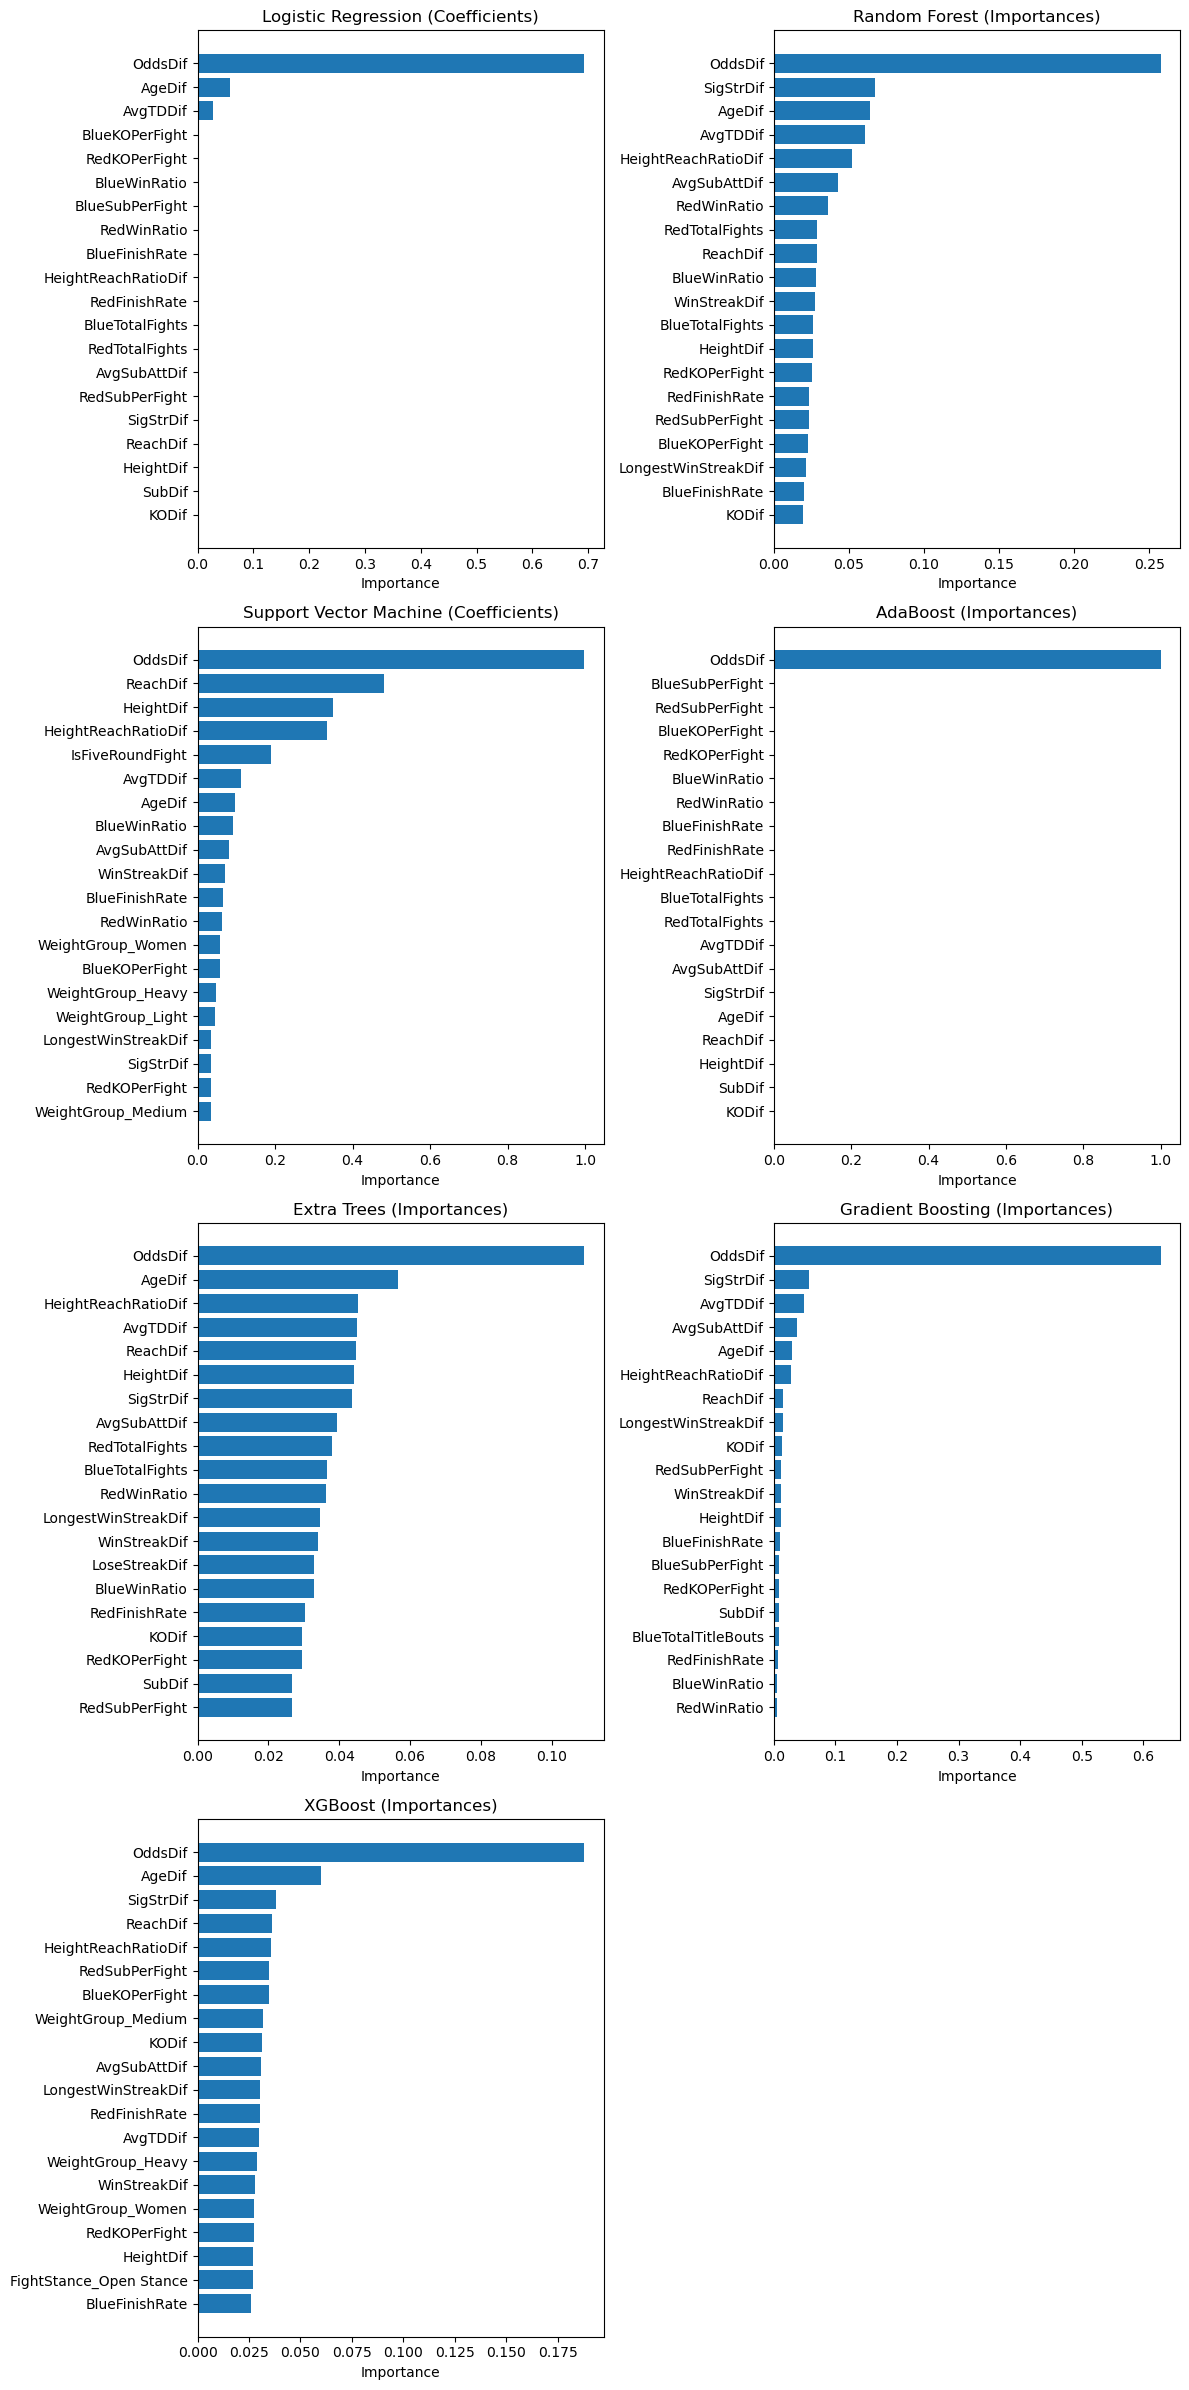

In [12]:
UFCModel.plot_feature_importances_grid(
    models_with_odds,
    feature_names=feature_names_with_odds,
    save_file=True,
    filename='Feature-importance-with-odds'
)

INFO:src.model:✅ Plot saved to: /home/mlioi/ufc-predictor/img/Feature-importance-no-odds


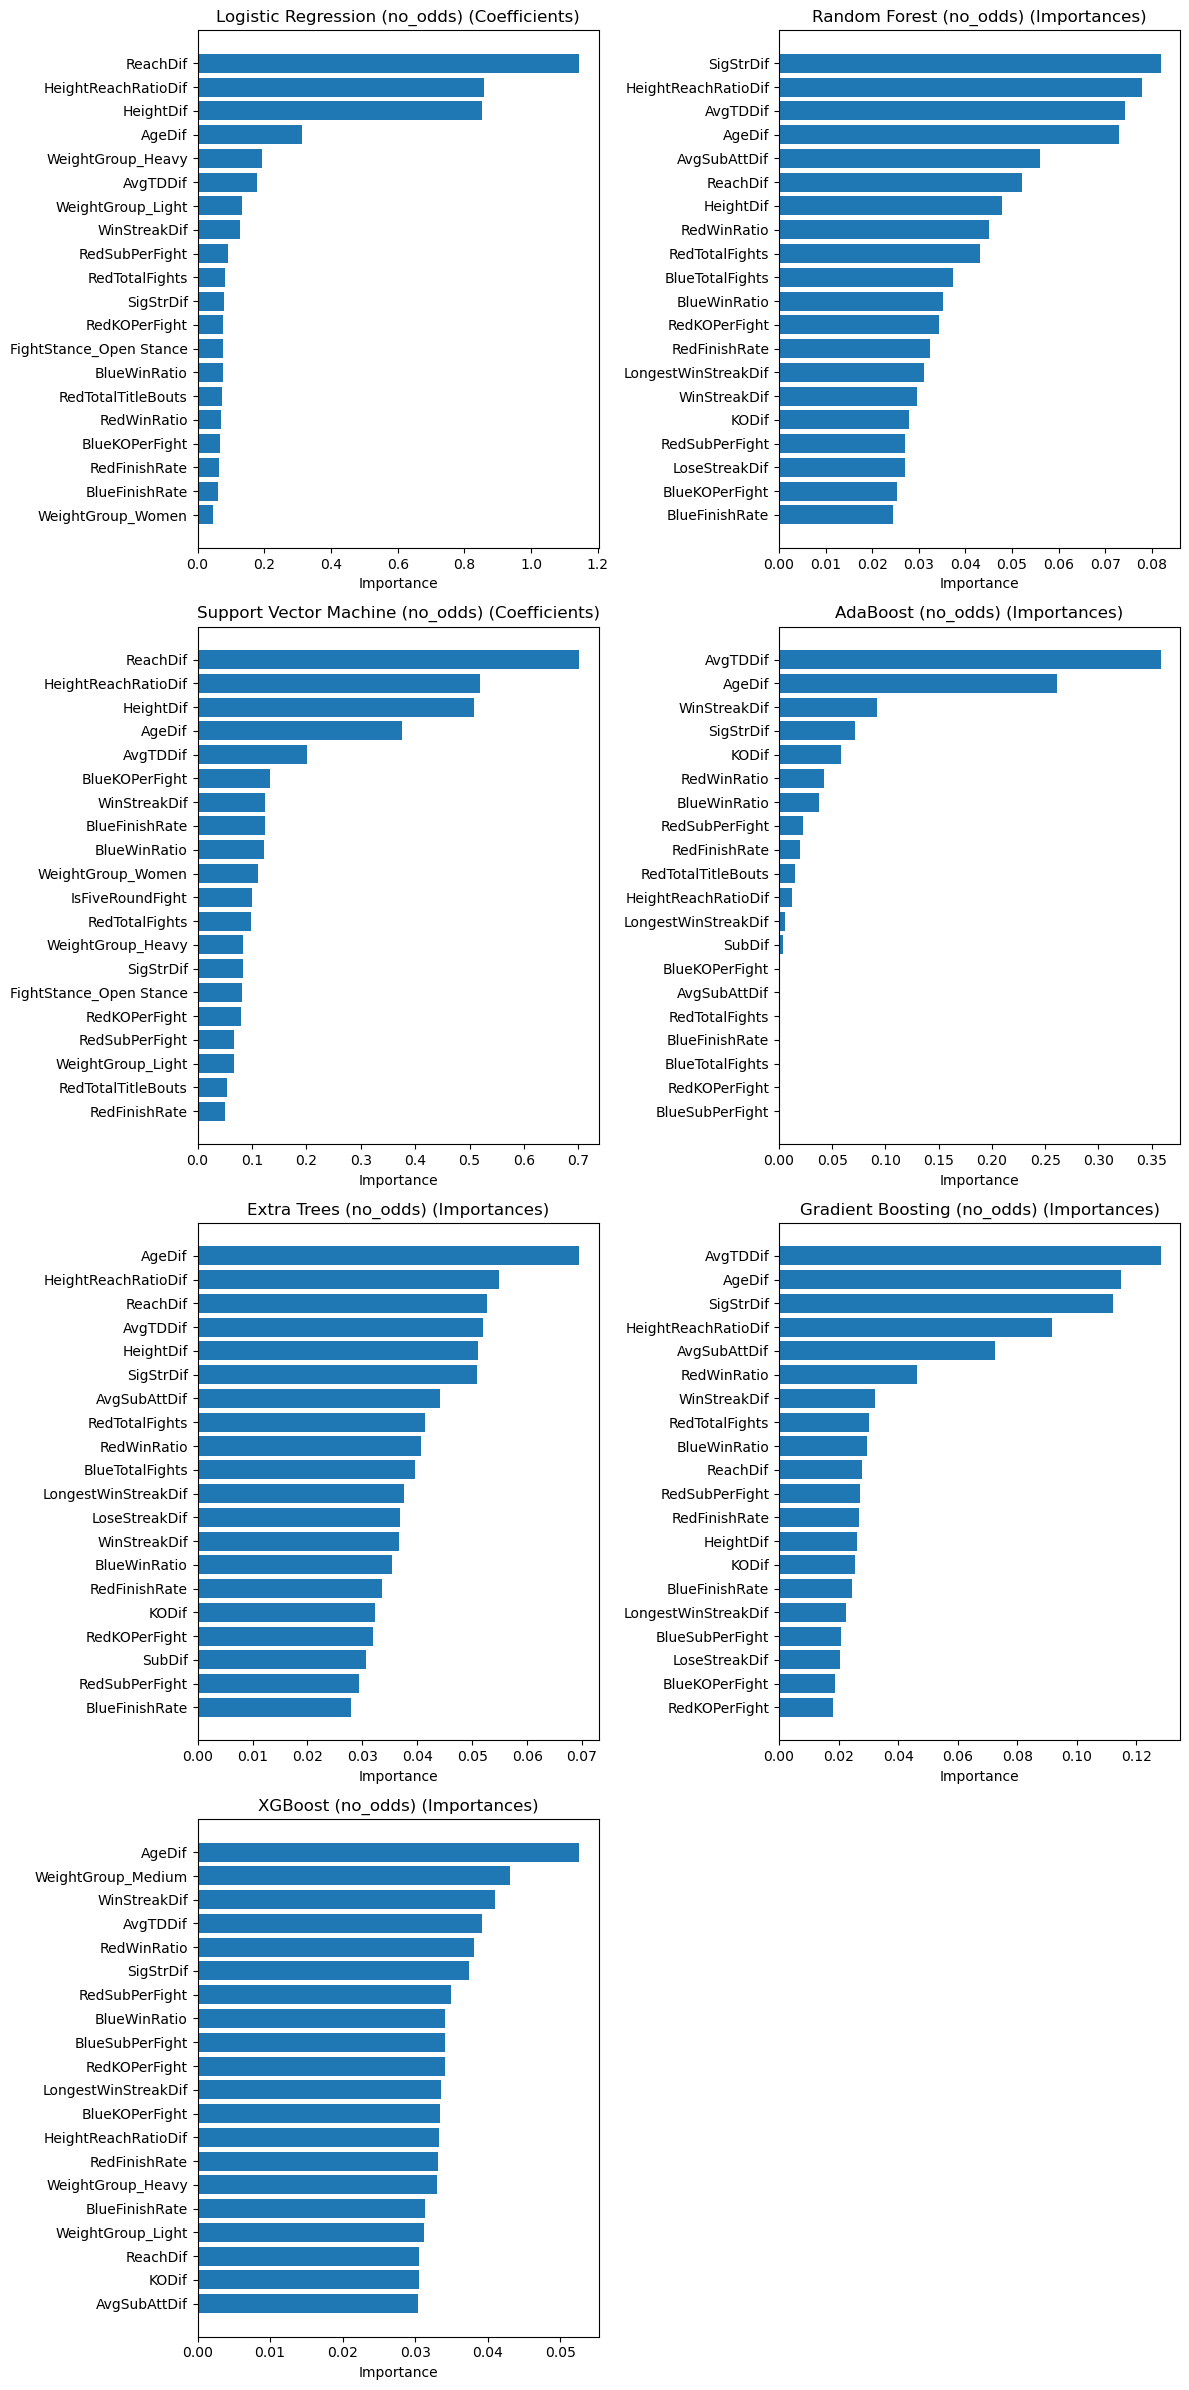

In [13]:
UFCModel.plot_feature_importances_grid(
    models_no_odds,
    feature_names=feature_names_no_odds,
    save_file=True,
    filename='Feature-importance-no-odds'
)

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should

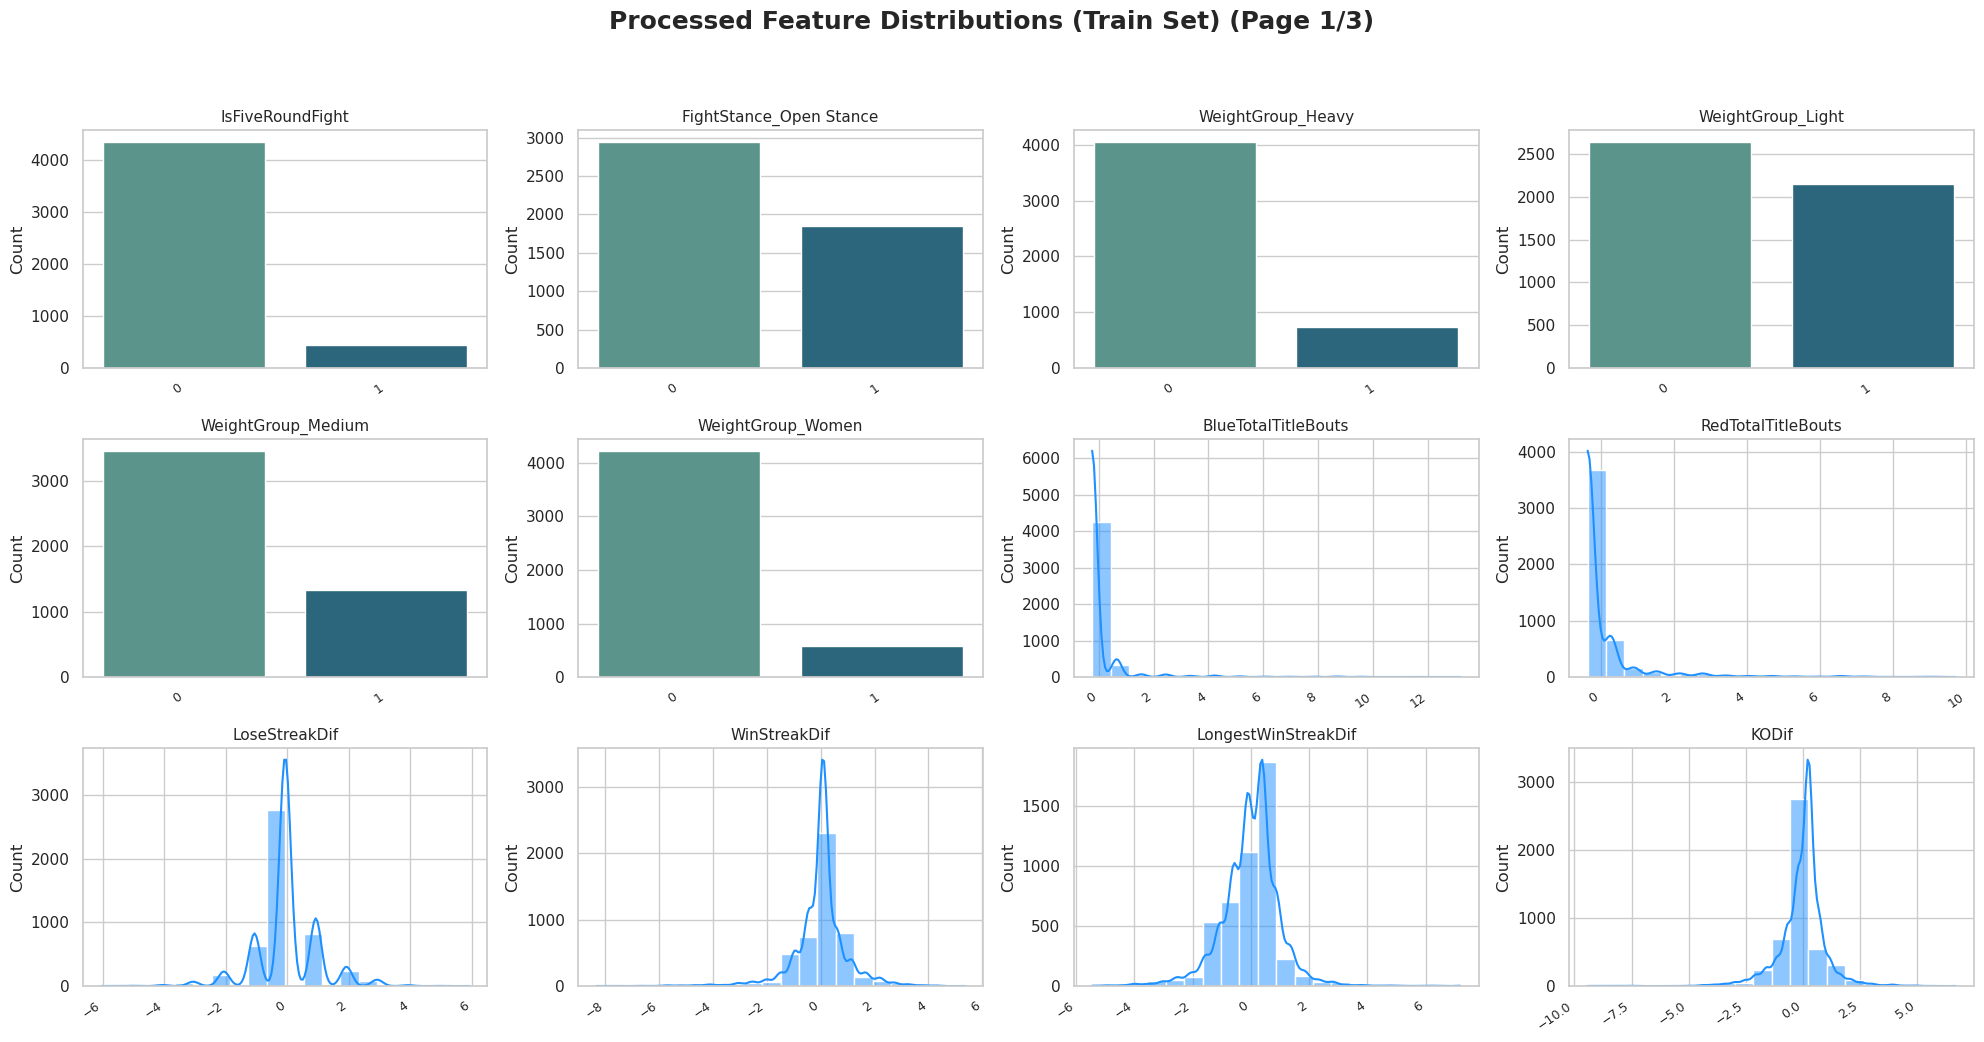

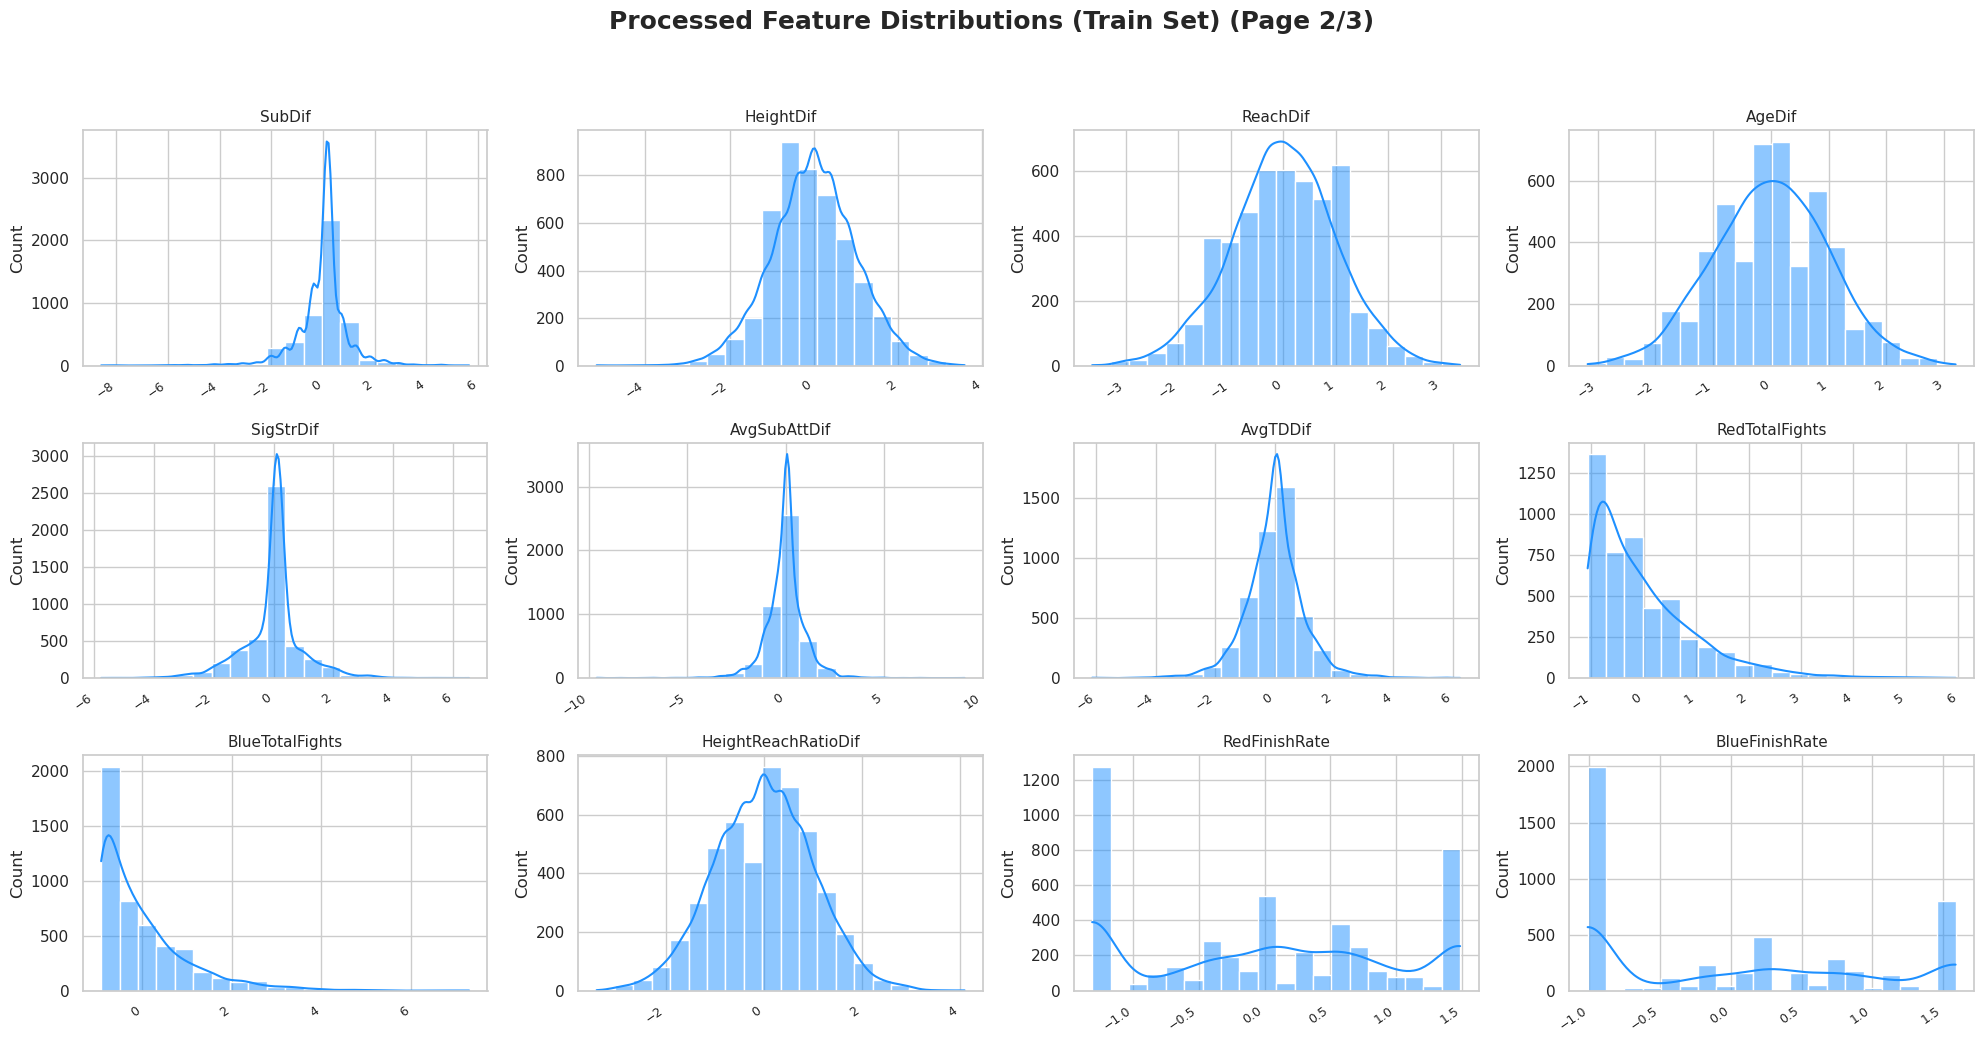

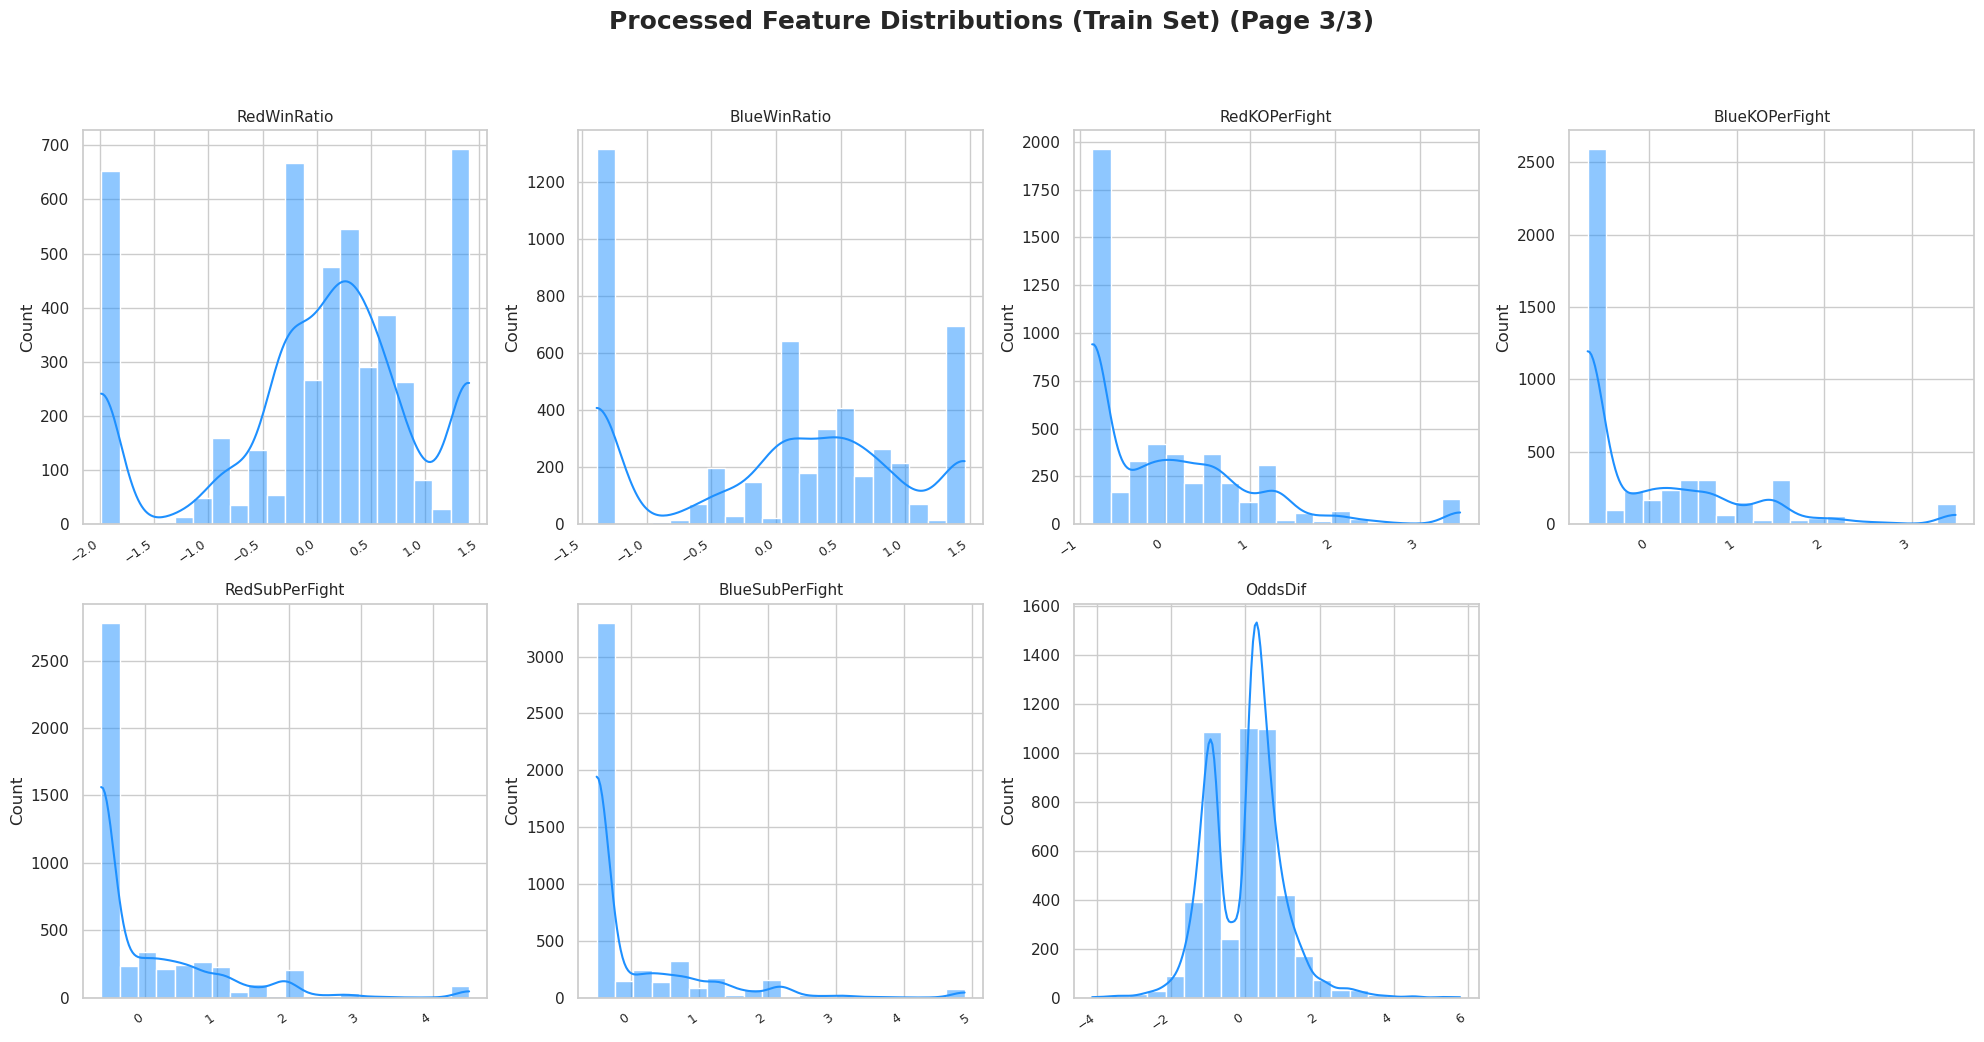

In [18]:
ufc_data.plot_feature_distributions(processed=True)

<div style="text-align: center;">
     <img src="../img/ufc_logo.png" width="800" /> 
</div>